In [1]:
import torch
import os
import re
import collections
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def load_stats(model_name):
    actions = {}
    comms = {}
    for file in os.listdir("communication/"+model_name):
        nr_updates = int(file[:-3])
        utters = torch.load("communication/"+model_name+'/'+file, map_location=lambda storage, loc: storage)
        utters = utters.view(-1, utters.shape[2], utters.shape[3])
        comms[nr_updates] = utters
        
        action = torch.load("action/"+model_name+'/'+file, map_location=lambda storage, loc: storage)
        action = action.view(-1)
        actions[nr_updates] = action
    return actions, comms


In [3]:
def word_stats(vocab):
    num_utter, message_length, vocab_size = vocab.shape
    word_dists = []
    for i in range(message_length):
        word = vocab[:,i,:].squeeze()
        stats = torch.mean(word, dim=0)
        dist = list(stats.detach().numpy())
        word_dists.append(dist)
    return word_dists

def plot_stats(nr_updates, word_dists, message_length, vocab_size, act):
    fig = plt.figure(figsize=(16,4))
    fig.suptitle("Stats after "+str(nr_updates)+" updates", fontsize=14)
    for i in range(message_length):
        dist = word_dists[i]
        ax= fig.add_subplot(1, message_length+1, i+1)
        ax.set_aspect(3)
        plt.axis([-0.5, vocab_size-0.5, 0, 1])
        plt.xlabel('words')
        plt.ylabel('usage distribution')
        plt.subplots_adjust(hspace=1)
        plt.title(str(i+1) + ". word in the sentence")
        plt.bar(list(range(vocab_size)), dist)
    ax = fig.add_subplot(1, message_length+1, message_length+1)
    act = act.numpy()
    plt.hist(act, bins=list(range(8)), color='red', align='left', rwidth=0.7)
    plt.xticks(np.arange(7), ['left', 'right', 'forw','drop', 'pick', 'toggle', 'done'])
    plt.title("Action distribution")
def plot_evolution(comms, acts):
    ordered_vocabs = collections.OrderedDict(sorted(comms.items()))
    for nr_updates, vocab in sorted(comms.items()):
        word_dists = word_stats(vocab)
        plot_stats(nr_updates, word_dists, vocab.shape[1], vocab.shape[2], acts[nr_updates])

/home/bence/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


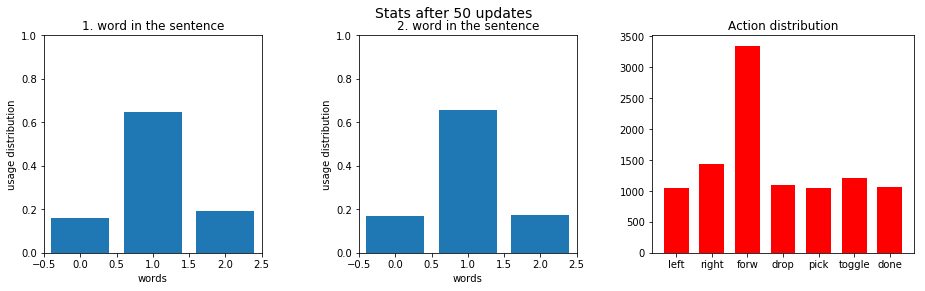

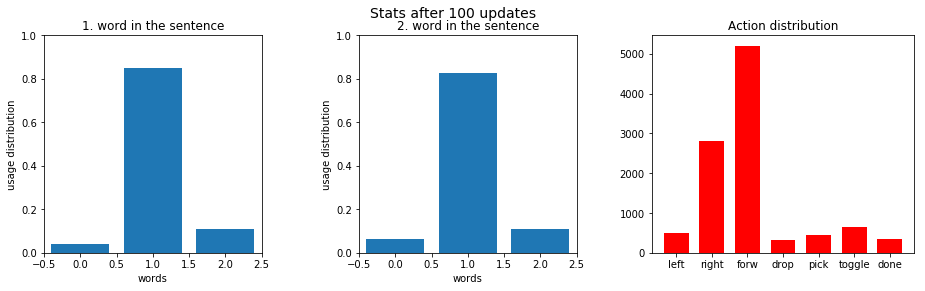

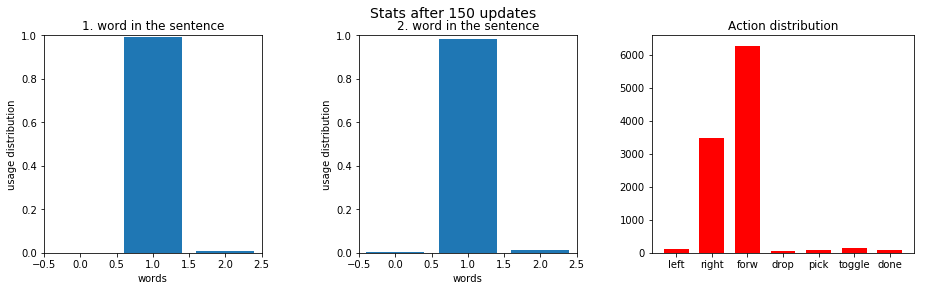

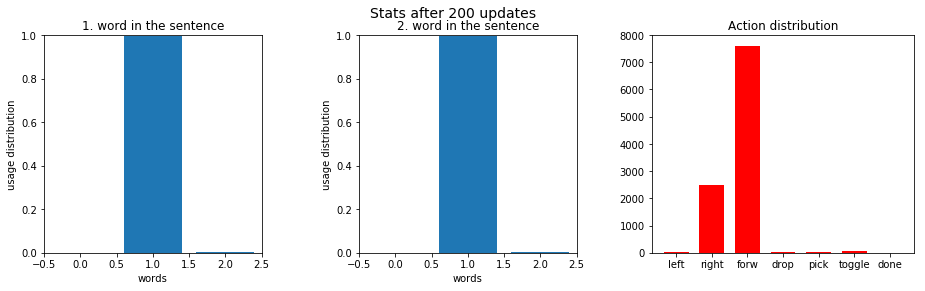

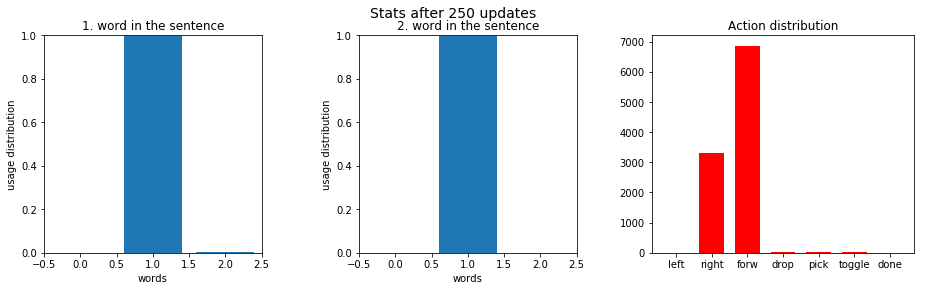

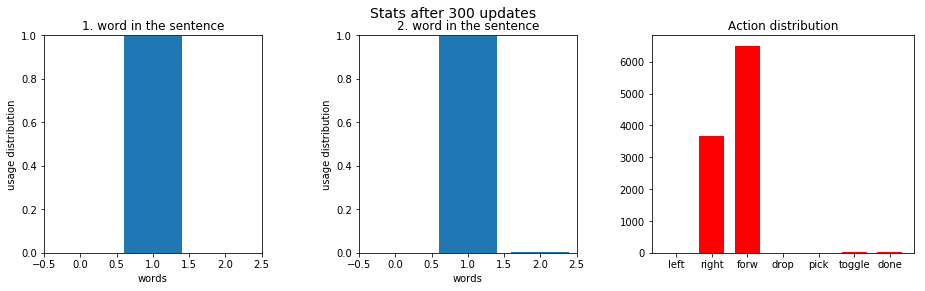

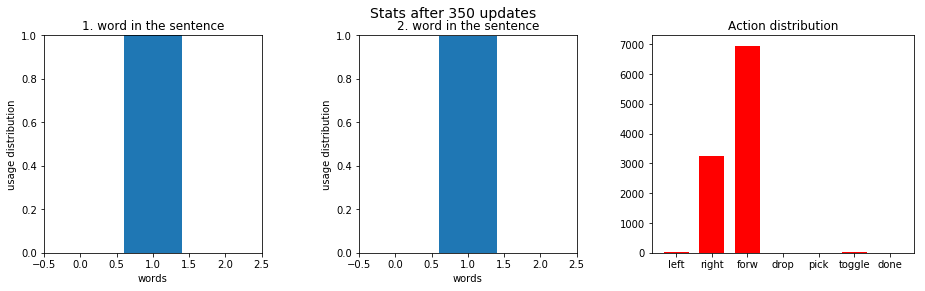

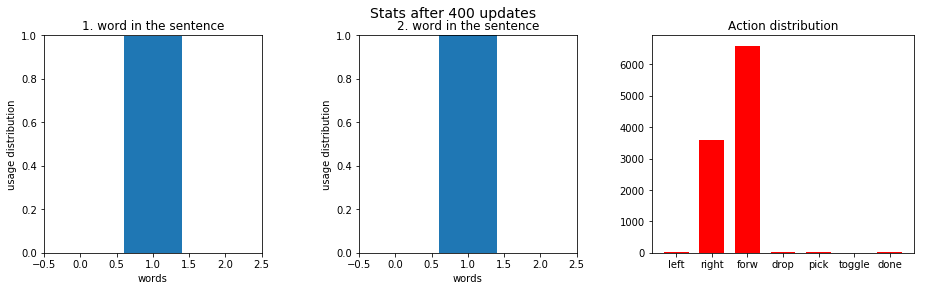

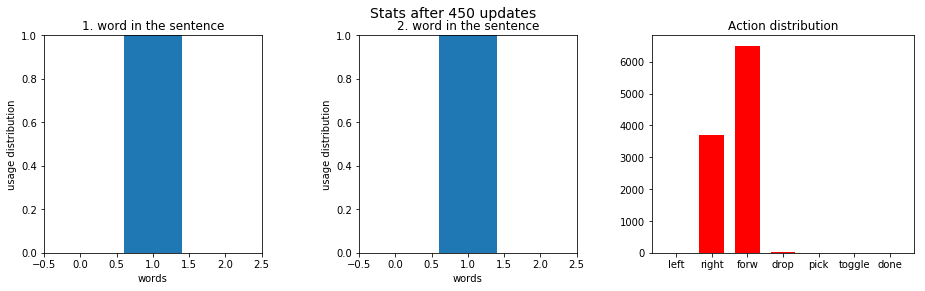

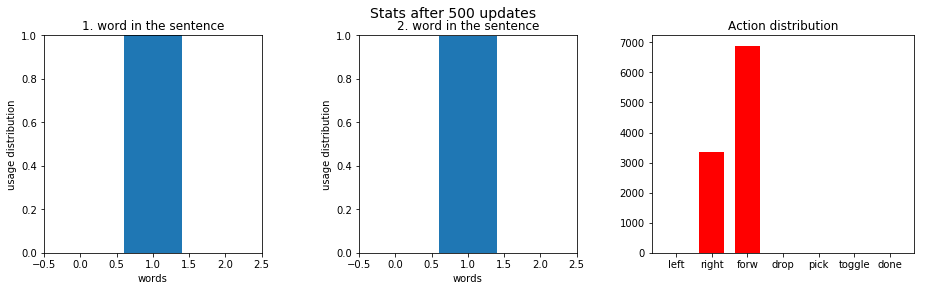

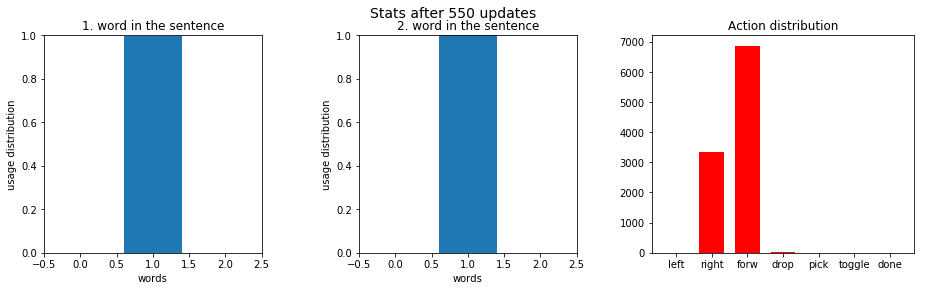

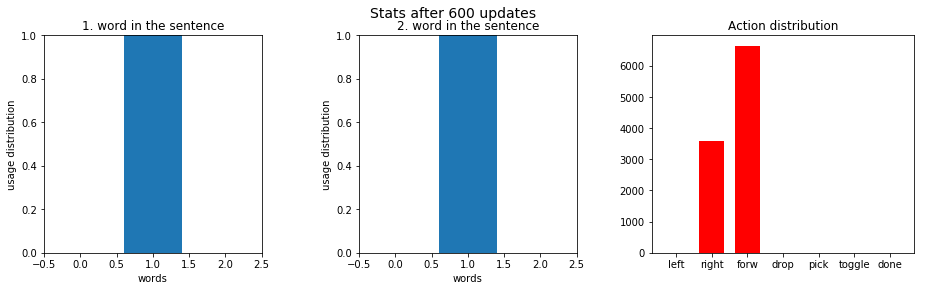

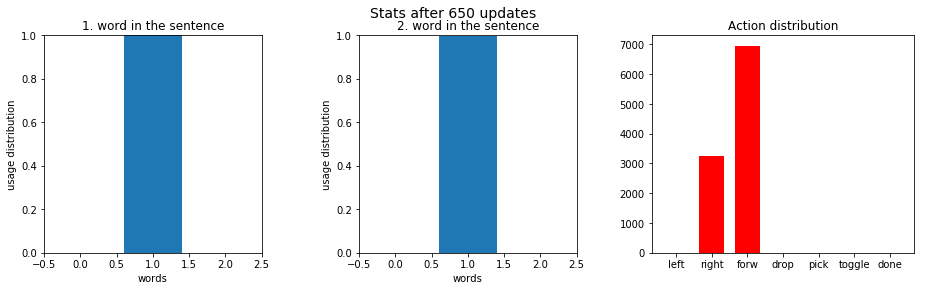

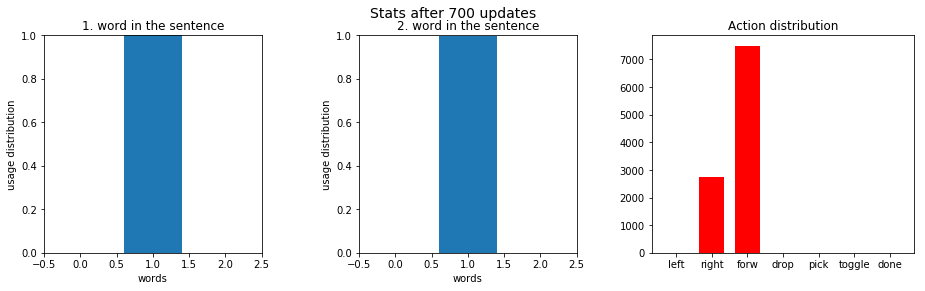

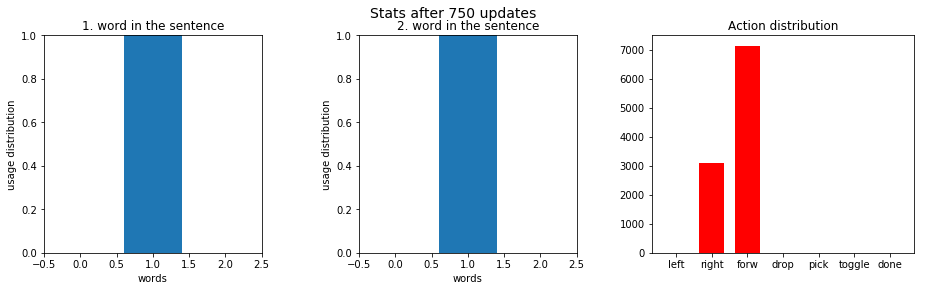

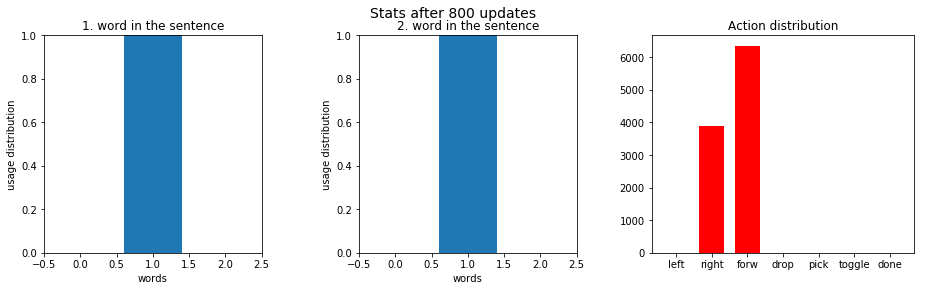

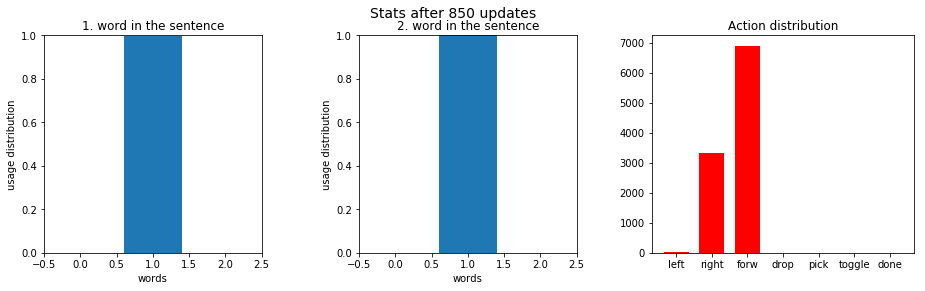

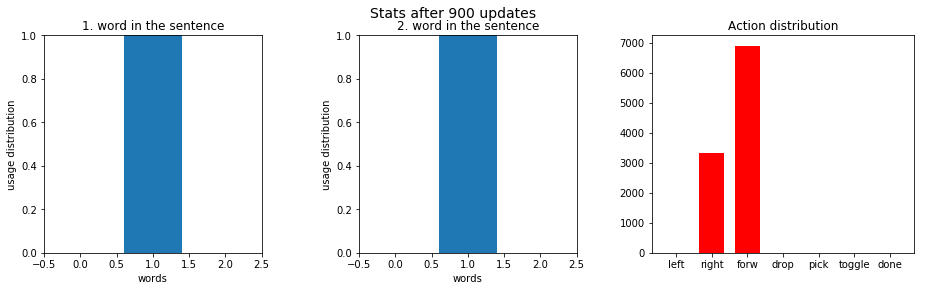

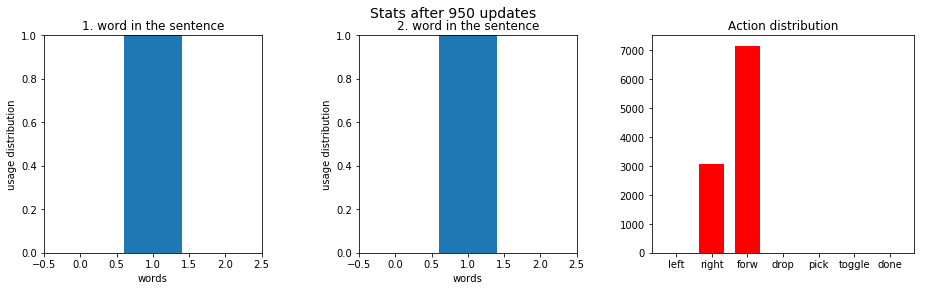

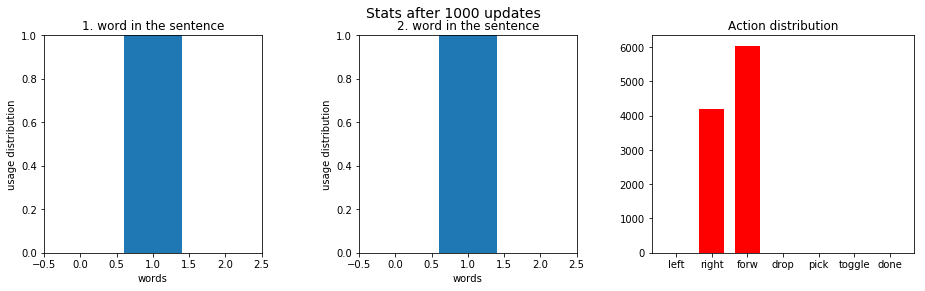

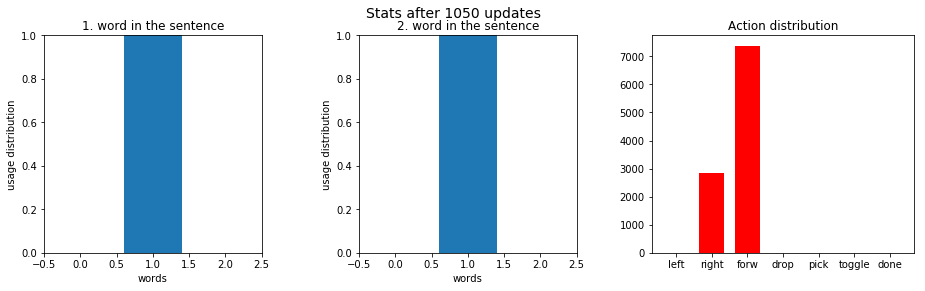

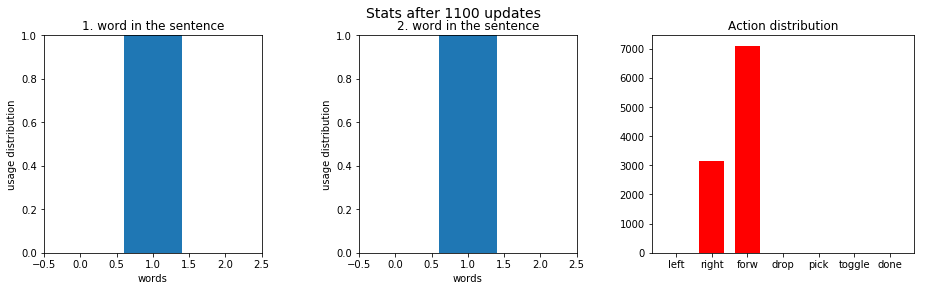

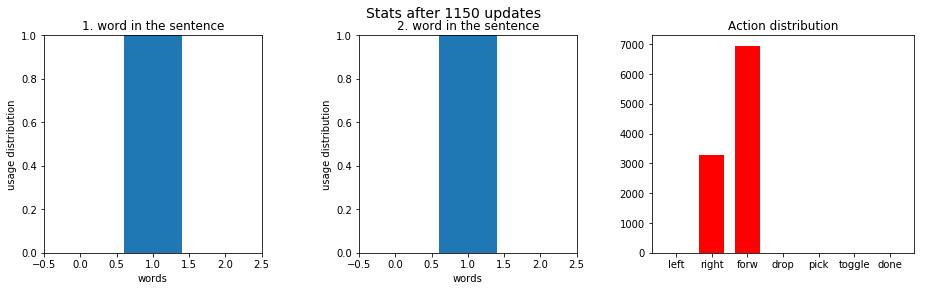

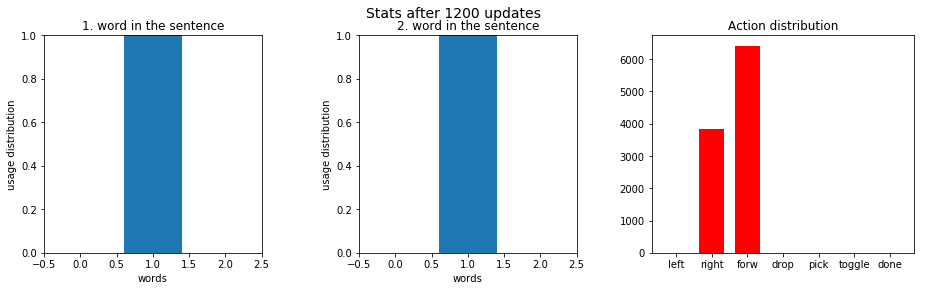

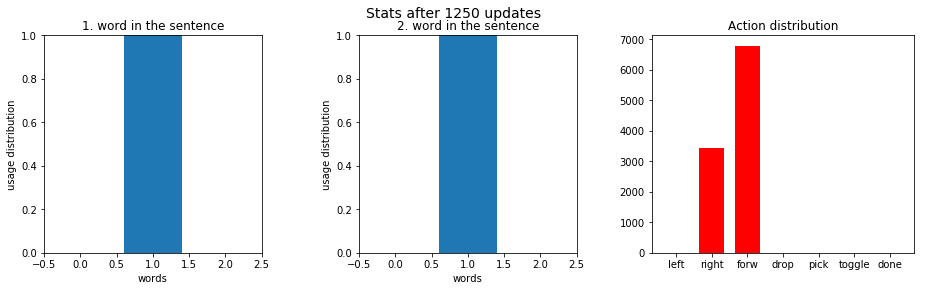

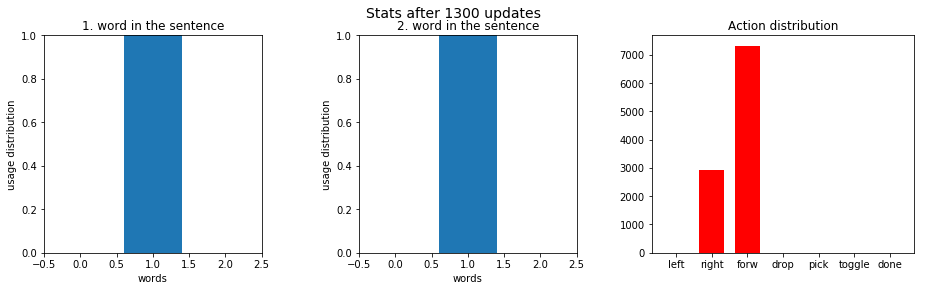

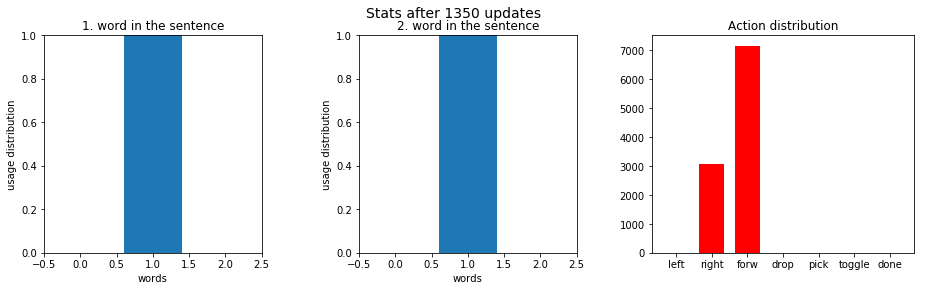

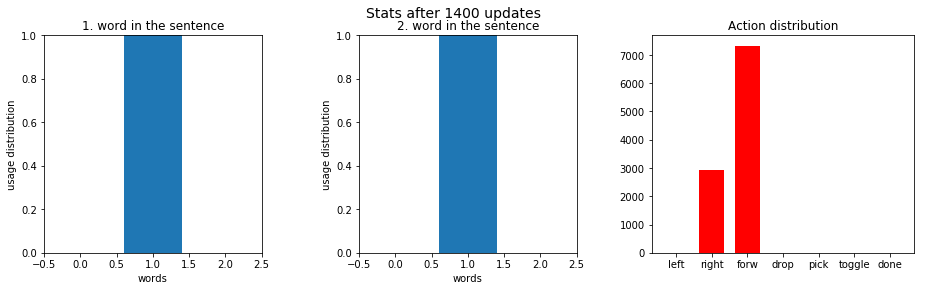

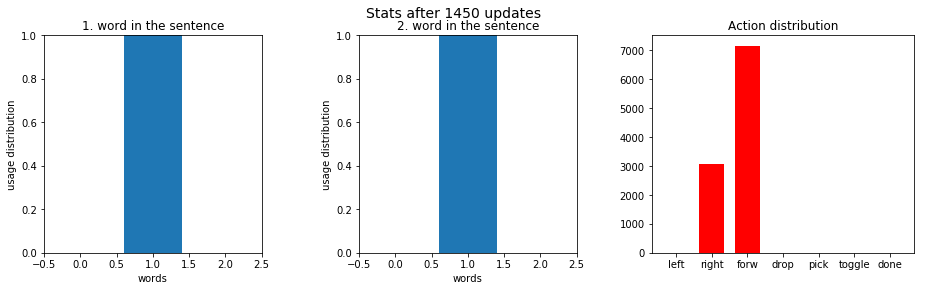

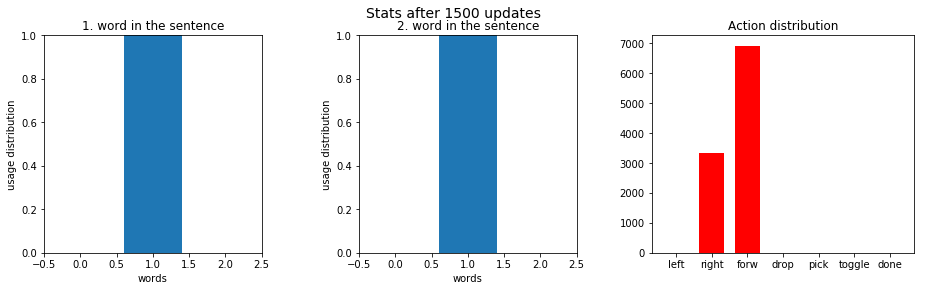

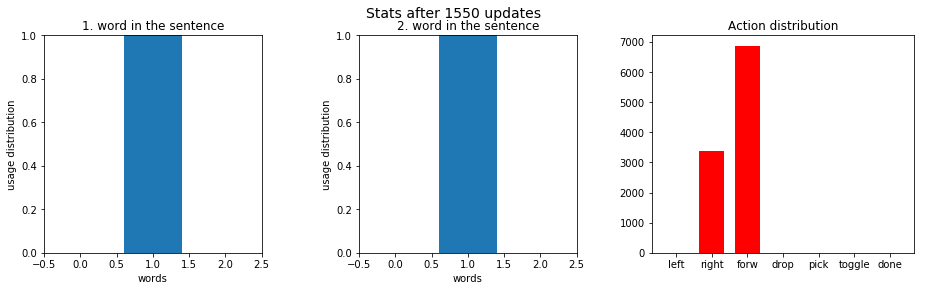

In [5]:
a, c = load_stats("19-03-18-22-15-46_BabyAI-GoToObj-v0_1_2_3_egocentric_blind_0.5_False")
plot_evolution(c, a)